# <span style="font-family: Cambria;">OpenCV-Essentials</span>

## <span style="font-family: Cambria;">Import Libraries</span>

In [4]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 787.7 kB/s eta 0:00:49
   ---------------------------------------- 0.1/38.6 MB 871.5 kB/s eta 0:00:45
   ---------------------------------------- 0.2/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.6 MB 908.0 kB/s eta 0:00:43
   ---------------------------------------- 0.2/38.6 MB 908.0 kB/s eta 0:00:43
   ---------------------------------------- 0.3/38.6 MB 1.0 MB/s eta 0:00:39
   ---------------------------------------- 0.4/38.6 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.4/38.6 MB 1.1 MB/s eta 0:00:35
   ------------

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

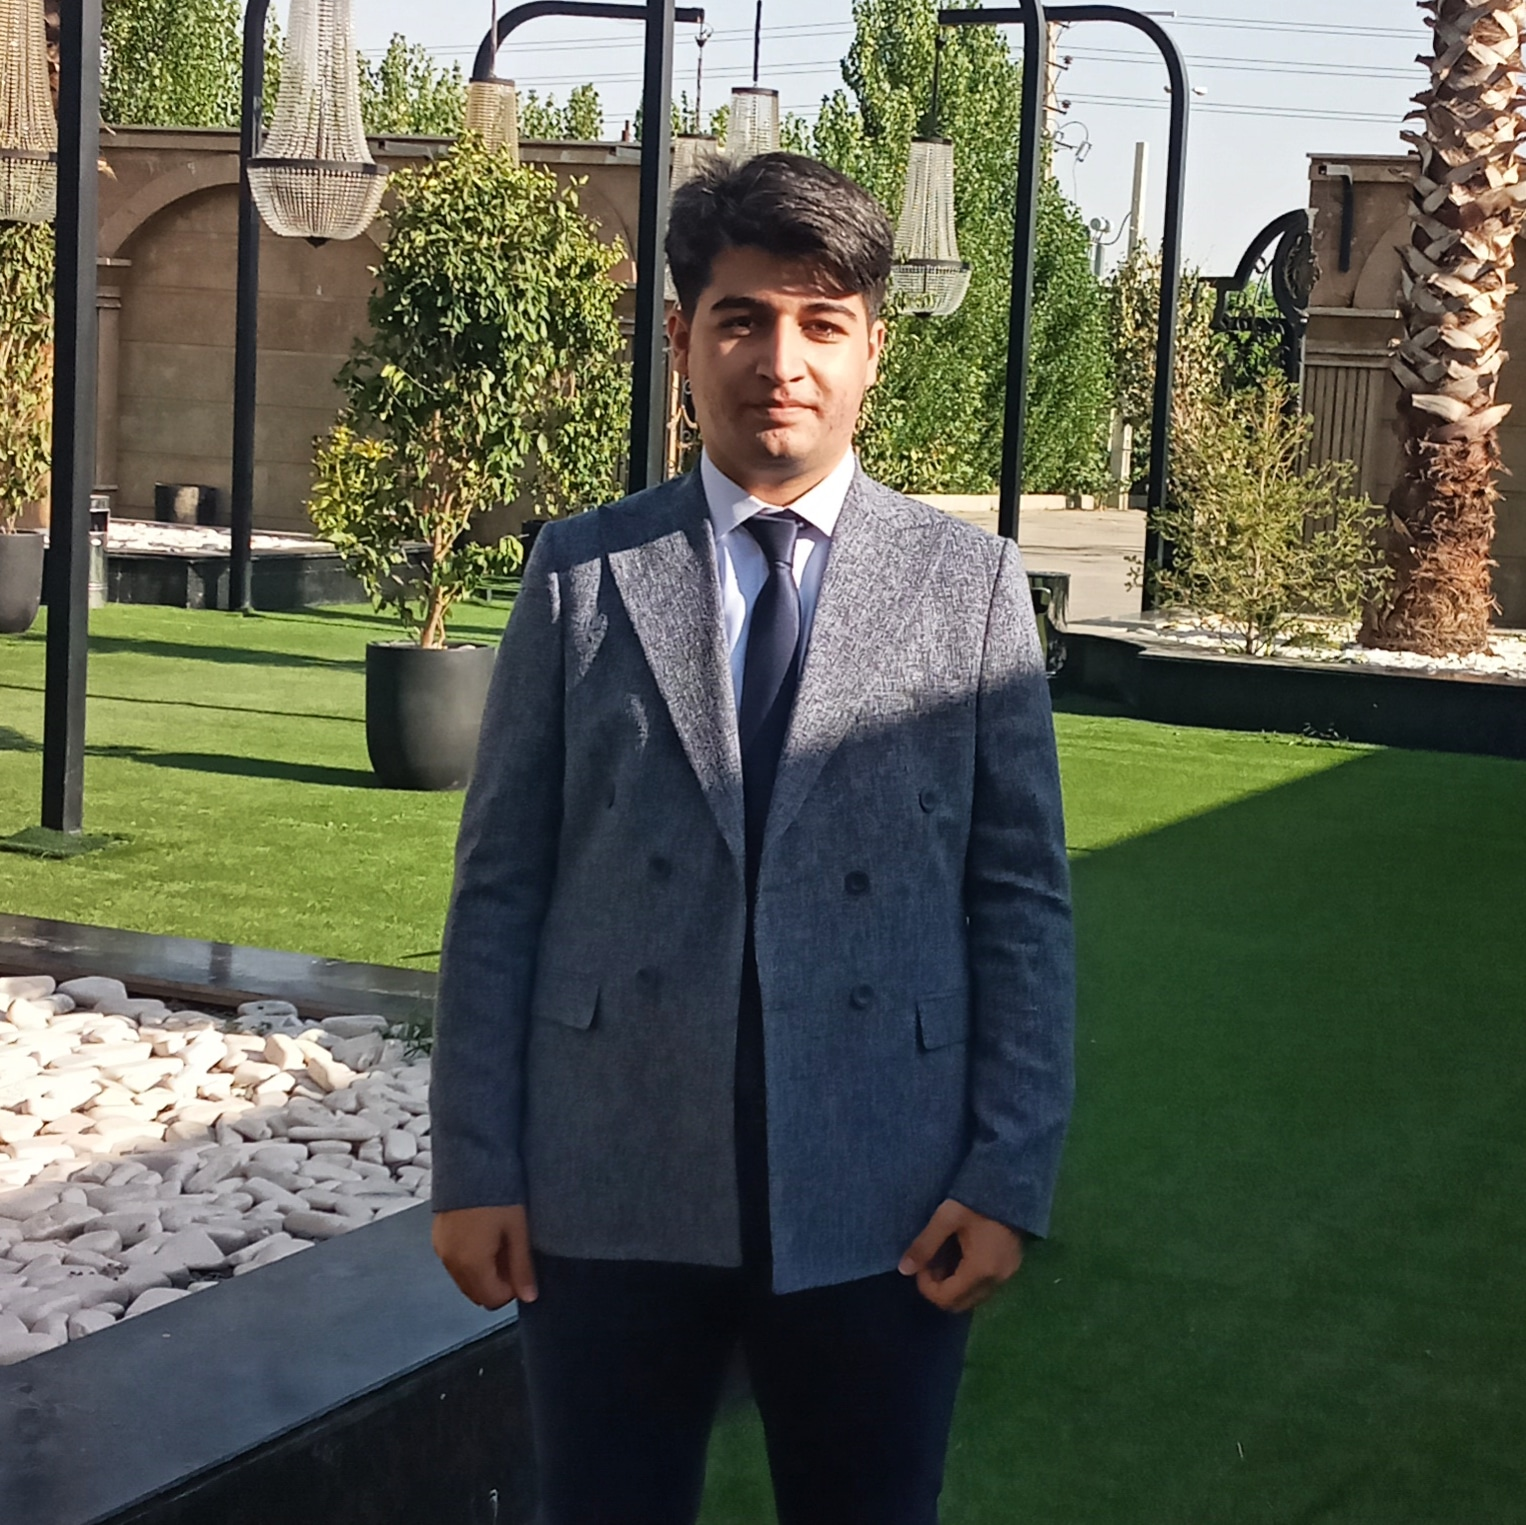

In [22]:
Image(filename="images/myimage1.jpg")

## <span style="font-family: Cambria;">Reading images using OpenCV</span>

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

### <font color="green">Function Syntax </font>

``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.

2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


### <font color="green">OpenCV Documentation</font>

1. **`Imread`**:  <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56" target="_blank">Documentation link</a>

2. **`ImreadModes`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80" target="_blank">Documentation link</a>


In [27]:
# Read image as gray scale.
cb_img = cv2.imread("images/myimage1.jpg", 0)
# Print the image data
print(cb_img)

[[187 203 237 ... 227 233 215]
 [158 167 200 ... 217 226 197]
 [144 134 135 ... 213 224 191]
 ...
 [ 54  53  54 ...  40  40  41]
 [ 55  52  53 ...  39  39  40]
 [ 56  53  53 ...  38  39  40]]


In [28]:
# print the size  of image
print("Image size (H, W) is:", cb_img.shape)

# print data-type of image
print("Data type of image is:", cb_img.dtype)

Image size (H, W) is: (1525, 1526)
Data type of image is: uint8


## <span style="font-family: Cambria;">Display Images using Matplotlib</span>

### <span style="font-family: Cambria;">wrong format</span>

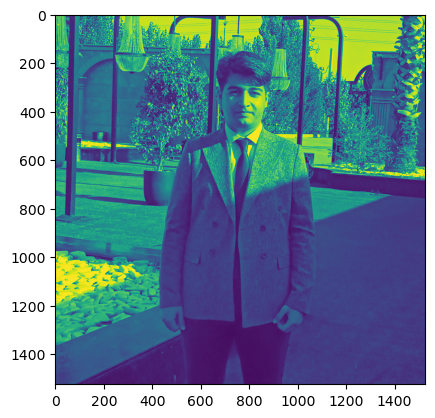

In [29]:
# Display image.
plt.imshow(cb_img)

### <span style="font-family: Cambria;">Right format</span>

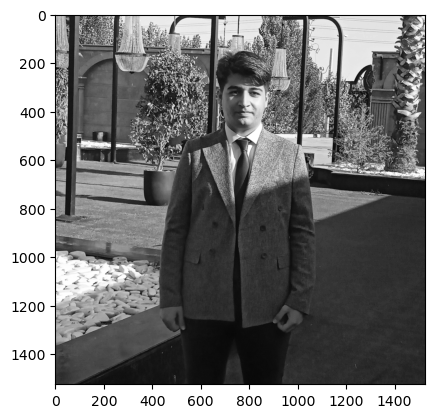

In [30]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")

 <span style="font-family: Cambria;">Now, we observe that Matplotlib correctly displays our image in grayscale.</span>

## <span style="font-family: Cambria;">Working with Color Images</span>

In [33]:
my_img = cv2.imread("images/myimage1.jpg", 1)
print("Image size (H, W, C) is:", my_img.shape)
print("Data type of image is:", my_img.dtype)

Image size (H, W, C) is: (1525, 1526, 3)
Data type of image is: uint8


## <span style="font-family: Cambria;">Display Images using Matplotlib</span>

### <span style="font-family: Cambria;">wrong format</span>

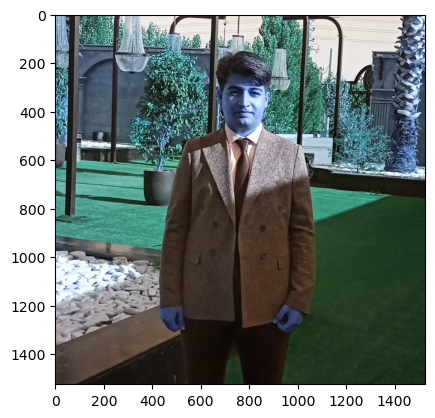

In [35]:
plt.imshow(my_img)

<span style="font-family: Cambria;">The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.</span>

### <span style="font-family: Cambria;">Right format</span>

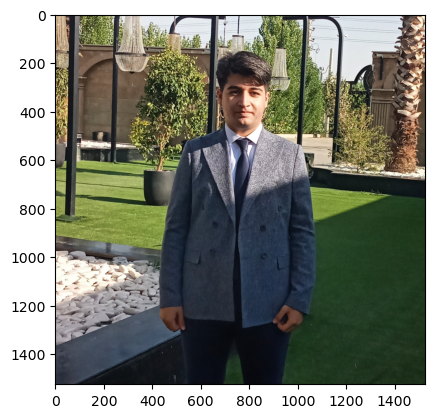

In [36]:
# Reverse color channels to BGR format and display.
my_img_channels_reversed = my_img[:, :, ::-1]
plt.imshow(my_img_channels_reversed)

<span style="font-family: Cambria;">Saving Images</span>

## <span style="font-family: Cambria;">Splitting and Merging Color Channels</span>

Text(0.5, 1.0, 'Merged Output')

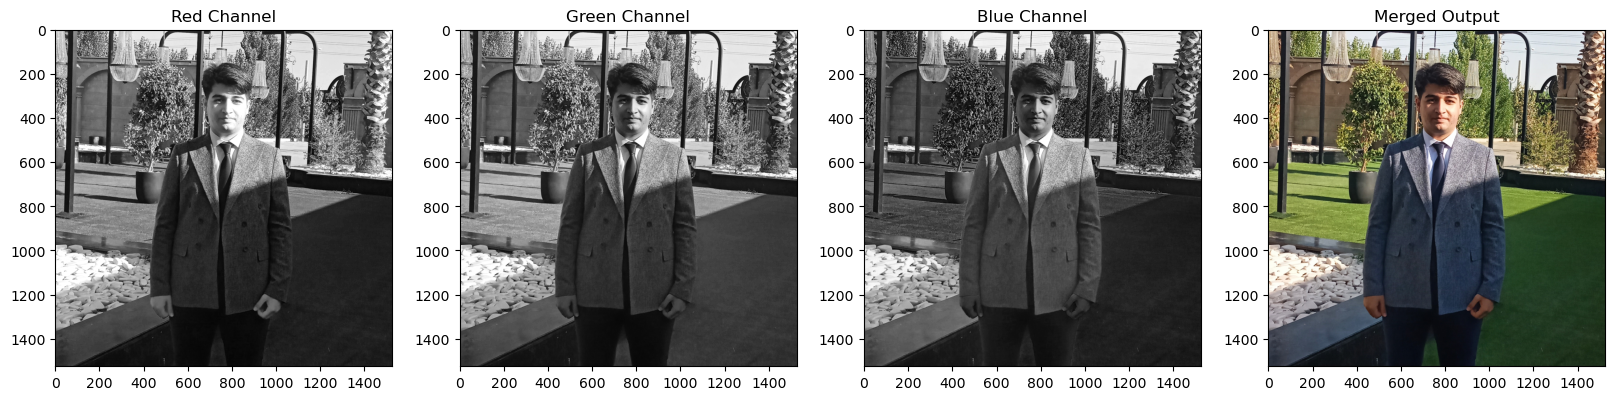

In [38]:
# Split the image into the B,G,R
img_bgr = cv2.imread("images/myimage1.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

## <span style="font-family: Cambria;">Converting to different Color Spaces</span>

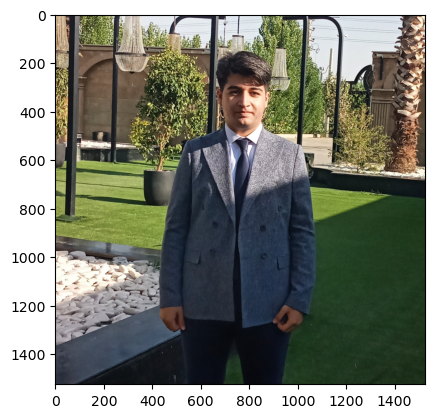

In [40]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### <span style="font-family: Cambria;">Changing to HSV color space</span>

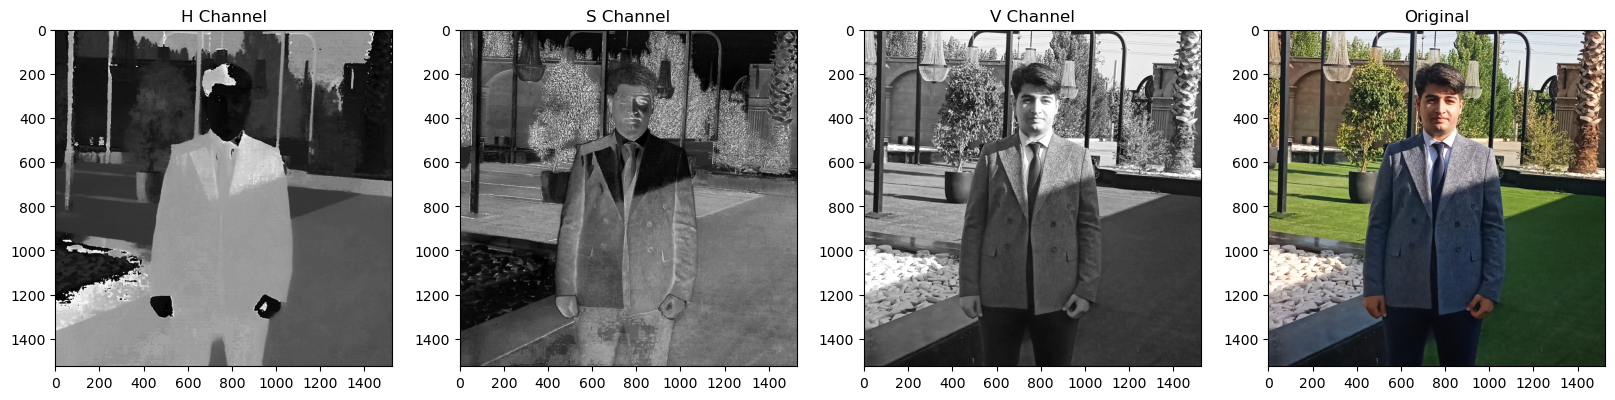

In [42]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_rgb);   plt.title("Original");

## <span style="font-family: Cambria;">Saving Images</span>

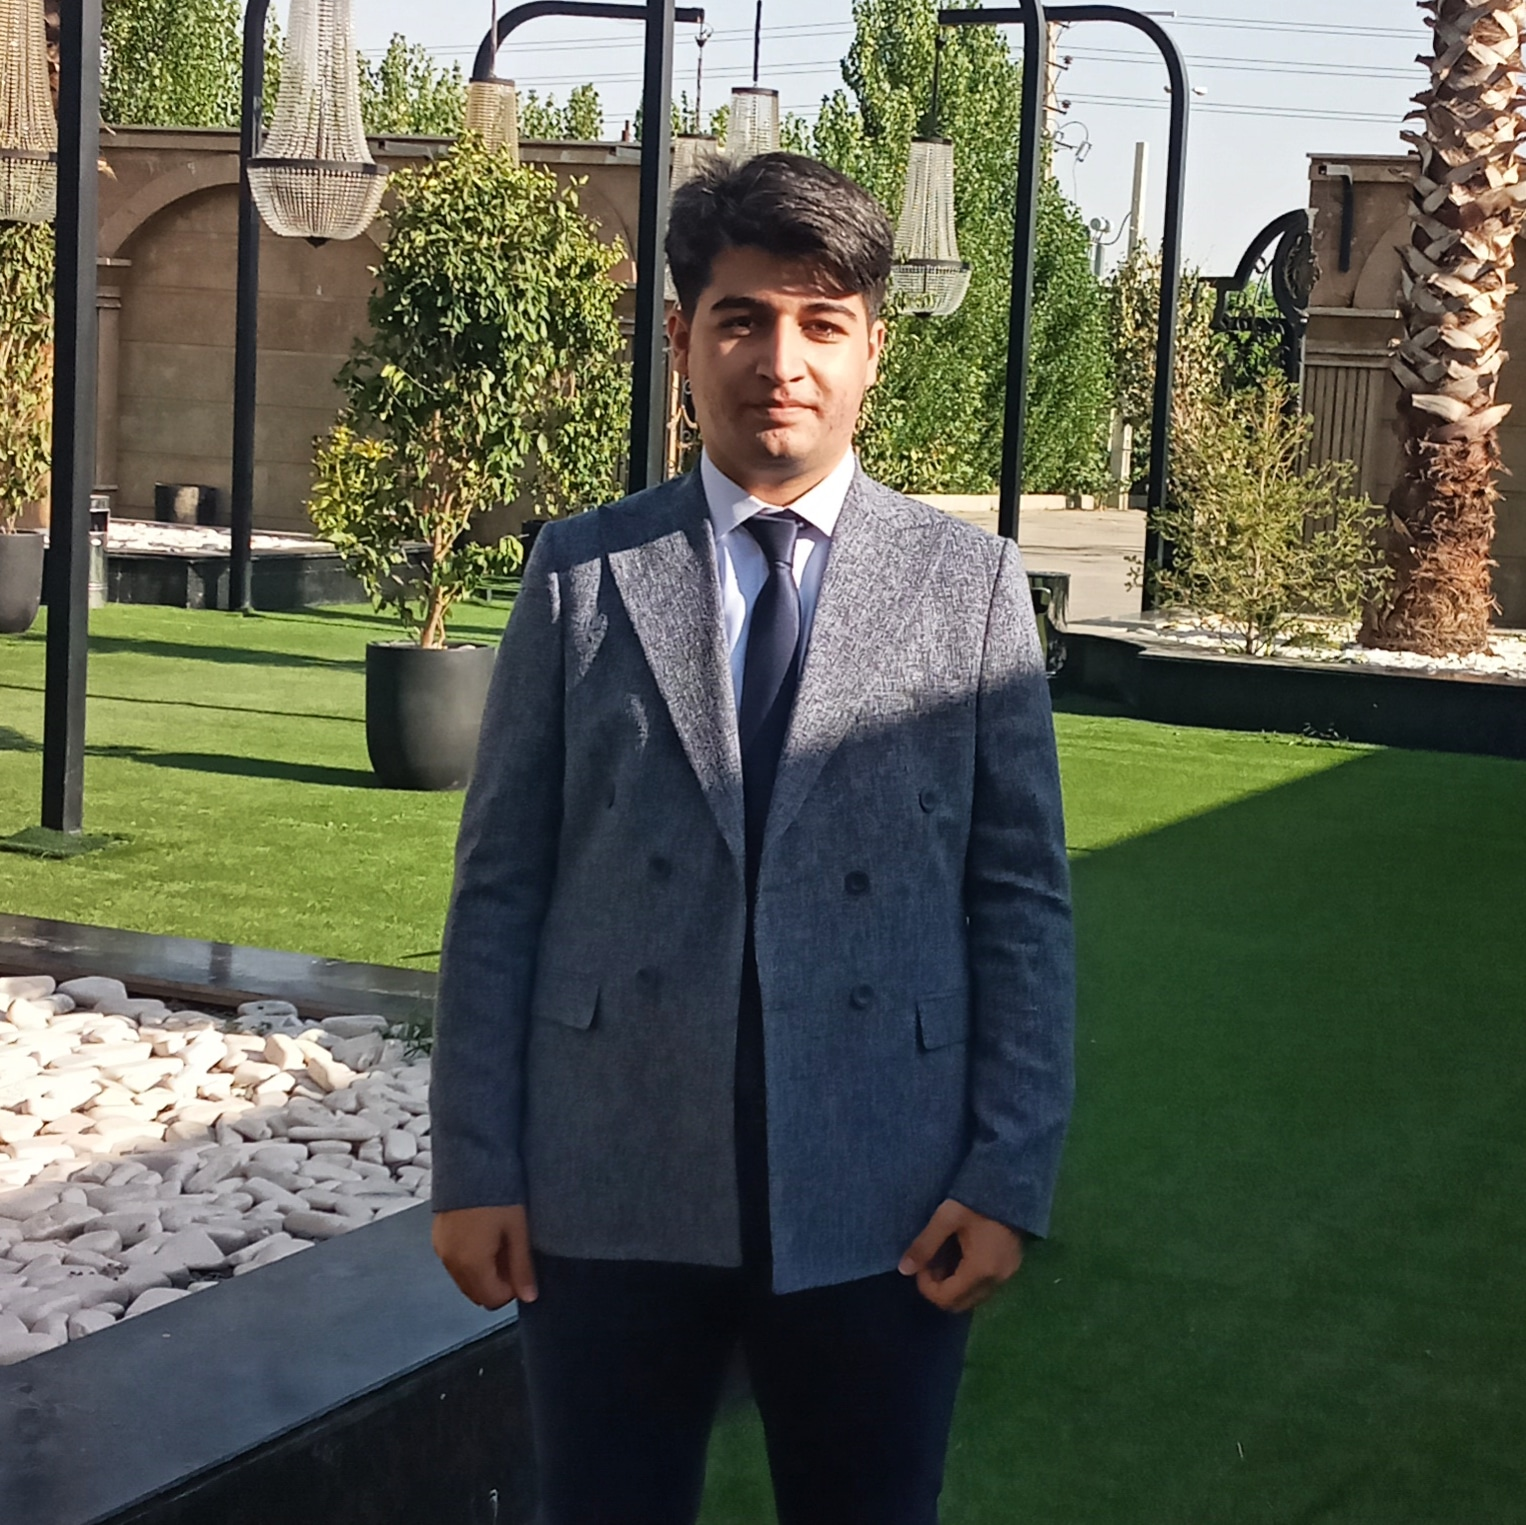

In [44]:
# save the image
cv2.imwrite("images/myimage1_SAVED.png", img_bgr)

Image(filename='images/myimage1_SAVED.png')